In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# nltk.download_shell()

In [3]:
yelp=pd.read_csv('yelp.csv')

In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.describe()


,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [7]:
yelp['text length']=yelp['text'].apply(len)

In [8]:
sns.set_style('white')

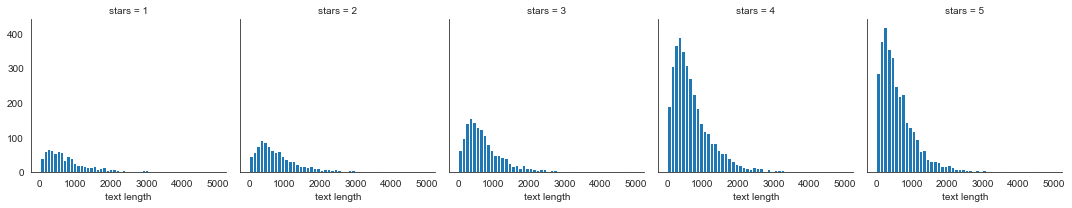

In [9]:
g=sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length',bins=50)

<AxesSubplot:xlabel='stars', ylabel='text length'>

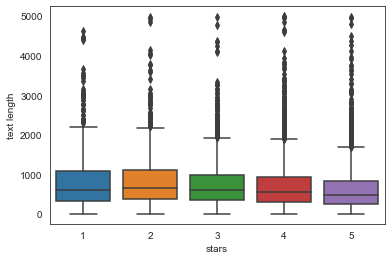

In [10]:
sns.boxplot(x='stars',y='text length',data=yelp)

In [11]:
import plotly as px
import cufflinks as cf

cf.go_offline()

In [12]:
# yelp.iplot(kind='box',x='stars',y='text length')
fig = px.express.box(yelp,x=yelp['stars'], y = yelp['text length'])
# fig.update_xaxes(type='category')
fig.show()

<AxesSubplot:xlabel='stars', ylabel='count'>

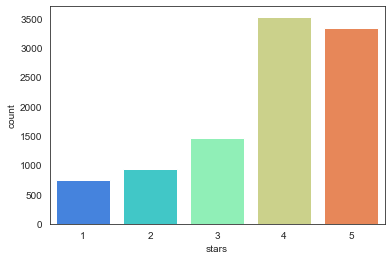

In [13]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

In [14]:
stars=yelp.groupby('stars').mean()

In [15]:
corr=stars.corr()

<AxesSubplot:>

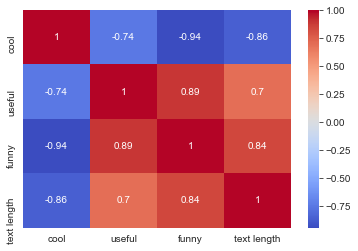

In [16]:
sns.heatmap(corr,cmap='coolwarm',annot=True)

In [17]:
yelp_class=yelp[(yelp['stars']==5) | (yelp['stars']==1)]

In [18]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [19]:
X= yelp_class['text']
y=yelp_class['stars']

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
count=CountVectorizer()

In [22]:
X=count.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=101)

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
nb=MultinomialNB()

In [27]:
nb.fit(X_train,y_train)

MultinomialNB()

In [28]:
prediction=nb.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226

[[159  69]
 [ 22 976]]


In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
from sklearn.pipeline import Pipeline

In [33]:
from nltk.corpus import stopwords
import string

In [34]:
def text_process(mess):
    nopunc=[c for c in mess if c not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word not in stopwords.words('english')]

In [35]:
X= yelp_class['text']
y=yelp_class['stars']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=101)

In [36]:
pipeline=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('model',MultinomialNB())
])

In [37]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

In [38]:
predictions1=pipeline.predict(X_test)

In [39]:
print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [40]:
pipeline1=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('model',MultinomialNB())
])

In [41]:
X= yelp_class['text']
y=yelp_class['stars']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=101)

In [42]:
pipeline1.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000279AB56D670>)),
                ('tfidf', TfidfTransformer()), ('model', MultinomialNB())])

In [43]:
predictions2=pipeline1.predict(X_test)

In [44]:
print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
pipeline2=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('model',RandomForestClassifier())
])

In [47]:
X= yelp_class['text']
y=yelp_class['stars']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=101)

In [48]:
pipeline2.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000279AB56D670>)),
                ('tfidf', TfidfTransformer()),
                ('model', RandomForestClassifier())])

In [49]:
predictions3=pipeline2.predict(X_test)

In [50]:
print(confusion_matrix(y_test,predictions3))
print(classification_report(y_test,predictions3))

[[ 58 170]
 [  1 997]]
              precision    recall  f1-score   support

           1       0.98      0.25      0.40       228
           5       0.85      1.00      0.92       998

    accuracy                           0.86      1226
   macro avg       0.92      0.63      0.66      1226
weighted avg       0.88      0.86      0.82      1226



<AxesSubplot:>

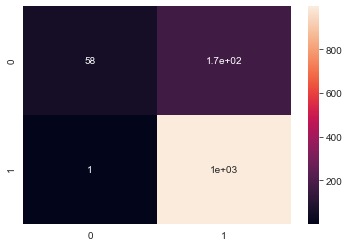

In [51]:
cmat=confusion_matrix(y_test,predictions3)
sns.heatmap(cmat,annot=True)